In [1]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex
from scipy.misc import imread
#from wordcloud import WordCloud, STOPWORDS # Wordcloud: pip install wordcloud
from collections import Counter

%matplotlib inline
pd.set_option('display.max_columns', None)

# Sets para entrenar

## Datos del TP 1

In [40]:
postulantes_educacion_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv', encoding='utf-8')
postulantes_genero_edad_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv', encoding='utf-8')
vistas_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_3_vistas.csv', encoding='utf-8')
postulaciones_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv', encoding='utf-8')
avisos_online_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_5_avisos_online.csv', encoding='utf-8')
avisos_detalle_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv', encoding='utf-8')

## Datos hasta 15 abril

In [41]:
postulantes_educacion_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_1_postulantes_educacion.csv', encoding='utf-8')
postulantes_genero_edad_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_2_postulantes_genero_y_edad.csv', encoding='utf-8')
vistas_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_3_vistas.csv', encoding='utf-8')
postulaciones_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_4_postulaciones.csv', encoding='utf-8')
avisos_online_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_5_avisos_online.csv', encoding='utf-8')
avisos_detalle_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_6_avisos_detalle.csv', encoding='utf-8')

# Sets para testear

## Datos desde 15 abril

In [73]:
postulantes_educacion_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_1_postulantes_educacion.csv', encoding='utf-8')
postulantes_genero_edad_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_2_postulantes_genero_y_edad.csv', encoding='utf-8')
vistas_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_3_vistas.csv', encoding='utf-8')
avisos_detalle_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_6_avisos_detalle.csv', encoding='utf-8')

## 338 faltantes

In [43]:
# Estos registros solo aparecen en el set a predecir
avisos_detalle_338_faltantes = pd.read_csv('../data/datos_navent_fiuba/338_faltantes/fiuba_6_avisos_detalle_missing_nivel_laboral.csv', encoding='utf-8')

### Juntamos los 338 registros que faltan con el set a predecir

In [44]:
print(len(avisos_detalle_desde_15_04))

13798


In [45]:
avisos_detalle_desde_15_04 = pd.concat([avisos_detalle_desde_15_04, avisos_detalle_338_faltantes])

In [46]:
print(len(avisos_detalle_desde_15_04))

14136


## Unificamos los datos del TP 1 con los de hasta el 15 de abril

### postulantes_educacion

In [47]:
print('Longitud original: ', len(postulantes_educacion_orig))
print('Longitud nuevo set: ', len(postulantes_educacion_hasta_15_04))
postulantes_educacion = pd.concat([postulantes_educacion_orig, postulantes_educacion_hasta_15_04])
print('Longitud concat: ', len(postulantes_educacion))

# Eliminamos los duplicados. En este caso se considera duplicado si estas 3 columnas matchean
postulantes_educacion.drop_duplicates(['idpostulante', 'nombre', 'estado'], keep='last', inplace=True)
print('Longitud unique: ', len(postulantes_educacion))

Longitud original:  298231
Longitud nuevo set:  407453
Longitud concat:  705684
Longitud unique:  568612


In [48]:
postulantes_educacion.to_csv('../data/1_postulantes_educacion.csv', index=False, sep=',', encoding='utf-8')

### postulantes_genero_edad

In [49]:
print('Longitud original: ', len(postulantes_genero_edad_orig))
print('Longitud nuevo set: ', len(postulantes_genero_edad_hasta_15_04))
postulantes_genero_edad = pd.concat([postulantes_genero_edad_orig, postulantes_genero_edad_hasta_15_04])
print('Longitud concat: ', len(postulantes_genero_edad))

# Eliminamos los duplicados. En este caso se considera duplicado si el idpostulante matchea
postulantes_genero_edad.drop_duplicates(['idpostulante'], keep='last', inplace=True)
print('Longitud unique: ', len(postulantes_genero_edad))

Longitud original:  200888
Longitud nuevo set:  297747
Longitud concat:  498635
Longitud unique:  408146


In [50]:
postulantes_genero_edad.to_csv('../data/2_postulantes_genero_edad.csv', index=False, sep=',', encoding='utf-8')

### vistas

In [51]:
print('Longitud original: ', len(vistas_orig))
print('Longitud nuevo set: ', len(vistas_hasta_15_04))
vistas = pd.concat([vistas_orig, vistas_hasta_15_04])
print('Longitud concat: ', len(vistas))

# Eliminamos los duplicados. En este caso se considera duplicado si estas 3 columnas matchean
vistas.drop_duplicates(['idaviso', 'timestamp', 'idpostulante'], keep='last', inplace=True)
print('Longitud unique: ', len(vistas))

Longitud original:  961897
Longitud nuevo set:  5758686
Longitud concat:  6720583
Longitud unique:  6682591


In [52]:
vistas.to_csv('../data/3_vistas.csv', index=False, sep=',', encoding='utf-8')

### postulaciones

In [53]:
print('Longitud original: ', len(postulaciones_orig))
print('Longitud nuevo set: ', len(postulaciones_hasta_15_04))
postulaciones = pd.concat([postulaciones_orig, postulaciones_hasta_15_04])
print('Longitud concat: ', len(postulaciones))

# Eliminamos los duplicados. En este caso se considera duplicado si estas 3 columnas matchean
postulaciones.drop_duplicates(['idaviso', 'idpostulante', 'fechapostulacion'], keep='last', inplace=True)
print('Longitud unique: ', len(postulaciones))

Longitud original:  3401623
Longitud nuevo set:  4909641
Longitud concat:  8311264
Longitud unique:  6604534


In [54]:
postulaciones.to_csv('../data/4_postulaciones.csv', index=False, sep=',', encoding='utf-8')

### avisos_online

In [55]:
print('Longitud original: ', len(avisos_online_orig))
print('Longitud nuevo set: ', len(avisos_online_hasta_15_04))
avisos_online = pd.concat([avisos_online_orig, avisos_online_hasta_15_04])
print('Longitud concat: ', len(avisos_online))

# Eliminamos los duplicados. En este caso se considera duplicado si esta columna matchea
avisos_online.drop_duplicates(['idaviso'], keep='last', inplace=True)
print('Longitud unique: ', len(avisos_online))

Longitud original:  5028
Longitud nuevo set:  4858
Longitud concat:  9886
Longitud unique:  9430


In [56]:
avisos_online.to_csv('../data/5_avisos_online.csv', index=False, sep=',', encoding='utf-8')

### avisos_detalle

In [57]:
print('Longitud original: ', len(avisos_detalle_orig))
print('Longitud nuevo set: ', len(avisos_detalle_hasta_15_04))
avisos_detalle = pd.concat([avisos_detalle_orig, avisos_detalle_hasta_15_04])
print('Longitud concat: ', len(avisos_detalle))

# Eliminamos los duplicados. En este caso se considera duplicado si matchean estas columnas (por no matchear todas)
avisos_detalle.drop_duplicates(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'ciudad', 'tipo_de_trabajo', 'nivel_laboral'], keep='last', inplace=True)
print('Longitud unique: ', len(avisos_detalle))

Longitud original:  13534
Longitud nuevo set:  18299
Longitud concat:  31833
Longitud unique:  19632


In [58]:
avisos_detalle.to_csv('../data/6_avisos_detalle.csv', index=False, sep=',', encoding='utf-8')

## Postulantes unificados de todas las fechas

In [59]:
print(len(postulantes_educacion))
print(len(postulantes_genero_edad))

568612
408146


In [60]:
postulantes = pd.merge(postulantes_educacion, postulantes_genero_edad, on='idpostulante', how='outer')
postulantes_test = pd.merge(postulantes_educacion_hasta_15_04, postulantes_genero_edad_hasta_15_04, on='idpostulante', how='outer')

In [61]:
print(len(postulantes))

610363


In [62]:
postulantes.head(10)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,8BkL,Universitario,En Curso,1976-07-21,FEM
1,8BkL,Universitario,Graduado,1976-07-21,FEM
2,8BkL,Posgrado,Graduado,1976-07-21,FEM
3,8BkL,Master,Graduado,1976-07-21,FEM
4,1d2B,Universitario,En Curso,1976-02-28,MASC
5,Ym2X,Otro,En Curso,1964-01-19,MASC
6,Ym2X,Universitario,Graduado,1964-01-19,MASC
7,6M3jr,Universitario,En Curso,1975-11-03,MASC
8,Z85B5,Universitario,En Curso,1976-04-27,FEM
9,Z85B5,Terciario/Técnico,Graduado,1976-04-27,FEM


In [63]:
print(len(postulantes))
print(len(postulantes_test))

610363
441412


In [64]:
postulantes.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

In [65]:
postulantes_test.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

In [66]:
postulantes_joined = pd.concat([postulantes, postulantes_test])

In [67]:
len(postulantes_joined)

1051775

In [68]:
postulantes_joined[postulantes_joined['idpostulante'] == '8BkL']

,idpostulante,nombre,estado,fechanacimiento,sexo
0,8BkL,Universitario,En Curso,1976-07-21,FEM
1,8BkL,Universitario,Graduado,1976-07-21,FEM
2,8BkL,Posgrado,Graduado,1976-07-21,FEM
3,8BkL,Master,Graduado,1976-07-21,FEM
9768,8BkL,Universitario,Graduado,1976-07-21,FEM
9769,8BkL,Posgrado,Graduado,1976-07-21,FEM
9770,8BkL,Master,Graduado,1976-07-21,FEM


In [69]:
postulantes_joined.drop_duplicates(subset = ['idpostulante', 'nombre', 'estado', 'fechanacimiento', 'sexo'], keep = 'last', inplace = True)

In [70]:
len(postulantes_joined)

610394

In [71]:
postulantes_joined.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

In [72]:
postulantes_joined.to_csv('../data/postulantes_joined.csv', index=False, sep=',', encoding='utf-8')

## Avisos unificados de todas las fechas

In [73]:
print(len(avisos_detalle))
avisos_detalle.head(1)

19632


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [74]:
print(len(avisos_detalle_desde_15_04))
avisos_detalle_desde_15_04.head(1)

14136


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1573840,1,VENDEDORA/O,Nuestra Búsqueda se orienta a la incorporación...,Capital Federal,Flores,NaN,Full-time,Otro,Ventas,RIBEIRO SUC. FLORES


In [75]:
avisos_detalle_joined = pd.concat([avisos_detalle, avisos_detalle_desde_15_04])

In [76]:
len(avisos_detalle_joined)

33768

In [77]:
avisos_detalle_joined.drop_duplicates(subset = ['idaviso', 'tituloa', 'descripcion', 'nombre_area'], keep = 'last',inplace = True)

In [78]:
len(avisos_detalle_joined)

25743

In [79]:
avisos_detalle_joined.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral            True
nombre_area             False
denominacion_empresa     True
dtype: bool

In [80]:
avisos_detalle_joined.head(3)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [81]:
avisos_detalle_joined.to_csv('../data/avisos_detalle_joined.csv', index=False, sep=',', encoding='utf-8')

# Limpieza/transformacion de datos

### Aplicamos las transformaciones tanto al set para entrenar como al que se va a usar para testear

In [143]:
postulantes_joined = pd.read_csv('../data/postulantes_joined.csv', sep=',', encoding='utf-8')
vistas_train = pd.read_csv('../data/3_vistas_train.csv', sep=',', encoding='utf-8')
postulaciones_train = pd.read_csv('../data/4_postulaciones_train.csv', sep=',', encoding='utf-8')
#avisos_online_train = pd.read_csv('../data/5_avisos_online_train.csv', sep=',', encoding='utf-8')
avisos_detalle_joined = pd.read_csv('../data/avisos_detalle_joined.csv', sep=',', encoding='utf-8')

#### Transfomaciones para postulantes

In [144]:
postulantes_joined.rename(columns={'nombre':'nombre_estudio','estado':'estado_estudio'}, inplace=True)

In [145]:
postulantes_joined.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1d2B,Universitario,EnCurso,1976-02-28,MASC,42


In [146]:
len(postulantes_joined)

408150

In [147]:
print('Existen datos de', postulantes_joined['idpostulante'].value_counts().size, 'postulantes distintos')

Existen datos de 408146 postulantes distintos


In [148]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [149]:
most_freq_nombre_estudio = postulantes_joined.nombre_estudio.mode()[0]
postulantes_joined.nombre_estudio.fillna(most_freq_nombre_estudio,inplace=True)
postulantes_joined.nombre_estudio.isnull().any()

False

In [150]:
most_freq_estado_estudio = postulantes_joined.estado_estudio.mode()[0]
postulantes_joined.estado_estudio.fillna(most_freq_estado_estudio,inplace=True)
postulantes_joined.estado_estudio.isnull().any()

False

In [151]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [152]:
def cuantificar_estudios(row):
    if (row['nombre_estudio'] == 'Doctorado'):
        row['nombre_estudio'] = 7
    if (row['nombre_estudio'] == 'Master'):    
        row['nombre_estudio'] = 6
    if (row['nombre_estudio'] == 'Posgrado'):    
        row['nombre_estudio'] = 5
    if (row['nombre_estudio'] == 'Universitario'):    
        row['nombre_estudio'] = 4
    if (row['nombre_estudio'] == 'Terciario/Técnico'):    
        row['nombre_estudio'] = 3
    if (row['nombre_estudio'] == 'Secundario'):    
        row['nombre_estudio'] = 2
    if (row['nombre_estudio'] == 'Otro'):    
        row['nombre_estudio'] = 1    
        
    if (row['estado_estudio'] == 'Graduado'):
        row['estado_estudio'] = 3
    if (row['estado_estudio'] == 'En Curso'):    
        row['estado_estudio'] = 2
    if (row['estado_estudio'] == 'Abandonado'):    
        row['estado_estudio'] = 1
        
    return row    

def descuantificar_estudios(row):
    if (row['nombre_estudio'] == 7):
        row['nombre_estudio'] = 'Doctorado'
    if (row['nombre_estudio'] == 6):    
        row['nombre_estudio'] = 'Master'
    if (row['nombre_estudio'] == 5):    
        row['nombre_estudio'] = 'Posgrado'
    if (row['nombre_estudio'] == 4):    
        row['nombre_estudio'] = 'Universitario'
    if (row['nombre_estudio'] == 3):    
        row['nombre_estudio'] = 'Terciario/Tecnico'
    if (row['nombre_estudio'] == 2):    
        row['nombre_estudio'] = 'Secundario'
    if (row['nombre_estudio'] == 1):    
        row['nombre_estudio'] = 'Otro'    
        
    if (row['estado_estudio'] == 3):
        row['estado_estudio'] = 'Graduado'
    if (row['estado_estudio'] == 2):    
        row['estado_estudio'] = 'EnCurso'
    if (row['estado_estudio'] == 1):    
        row['estado_estudio'] = 'Abandonado'
        
    return row    

In [153]:
postulantes_joined = postulantes_joined.apply(lambda row: cuantificar_estudios(row), axis=1)

In [154]:
# Obtenemos max de la columna nombre
idx = postulantes_joined.groupby(['idpostulante'])['nombre_estudio'].transform(max) == postulantes_joined['nombre_estudio']

In [155]:
# Sobre los anteriores, obtenemos los max de la columna estado
idx_postulantes_educacion_max = postulantes_joined[idx].groupby(['idpostulante'])['estado_estudio'].transform(max) == postulantes_joined[idx]['estado_estudio']

In [156]:
postulantes_joined = postulantes_joined[idx][idx_postulantes_educacion_max]

In [157]:
print(len(postulantes_joined))

408150


In [158]:
# Para volver a strings: 
postulantes_joined = postulantes_joined.apply(lambda row: descuantificar_estudios(row), axis=1)

In [159]:
postulantes_joined.head(2)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1d2B,Universitario,EnCurso,1976-02-28,MASC,42
1,Ym2X,Universitario,Graduado,1964-01-19,MASC,54


In [160]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [161]:
most_freq_fechanacimiento = postulantes_joined.fechanacimiento.mode()[0]
postulantes_joined.fechanacimiento.fillna(most_freq_fechanacimiento,inplace=True)
postulantes_joined.fechanacimiento.isnull().any()

False

In [162]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [163]:
# Convierto columnas con fechas a datetime
postulantes_joined['fechanacimiento'] = pd.to_datetime(postulantes_joined.fechanacimiento, format='%Y/%m/%d', errors='coerce')

In [164]:
most_freq_fechanacimiento = postulantes_joined.fechanacimiento.mode()[0]
postulantes_joined.fechanacimiento.fillna(most_freq_fechanacimiento,inplace=True)
postulantes_joined.fechanacimiento.isnull().any()

False

In [165]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [166]:
# Agrego columna edad
anio_actual = pd.to_datetime('today').year
postulantes_joined['edad'] = postulantes_joined.fechanacimiento.map(lambda fecha: anio_actual - fecha.year).astype(int)

In [167]:
postulantes_joined.edad.isnull().any()

False

In [168]:
len(postulantes_joined)

408150

In [169]:
postulantes_joined.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1d2B,Universitario,EnCurso,1976-02-28,MASC,42


In [170]:
postulantes_joined['edad'] = postulantes_joined['edad'].astype(int)

In [171]:
postulantes_joined.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1d2B,Universitario,EnCurso,1976-02-28,MASC,42


In [172]:
postulantes_joined.dtypes

idpostulante               object
nombre_estudio             object
estado_estudio             object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

In [173]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

#### Transfomaciones para avisos

In [174]:
print(len(avisos_detalle_joined))
print('Existen avisos nulos:', avisos_detalle_joined.idaviso.isnull().any())
#avisos_detalle_joined = avisos_detalle_joined.dropna(subset=['idaviso'], how='all')
#print(len(avisos_detalle_joined))

25288
Existen avisos nulos: False


In [175]:
avisos_detalle_joined.drop(columns=['idpais','ciudad','mapacalle', 'nombre_zona'], inplace=True)

ValueError: labels ['idpais' 'ciudad' 'mapacalle' 'nombre_zona'] not contained in axis

In [ ]:
avisos_detalle_joined.head(1)

In [ ]:
print(avisos_detalle_joined.tipo_de_trabajo.isnull().any())
print(avisos_detalle_joined.nivel_laboral.isnull().any())
print(avisos_detalle_joined.nombre_area.isnull().any())
print(avisos_detalle_joined.descripcion.isnull().any())

In [ ]:
print('Existen',avisos_detalle_joined.nivel_laboral.isnull().sum(), 'avisos que no especifican nivel laboral')

In [ ]:
most_freq_nivel_laboral = avisos_detalle_joined.nivel_laboral.mode()[0]
most_freq_nivel_laboral

In [ ]:
avisos_detalle_joined.nivel_laboral.fillna(most_freq_nivel_laboral,inplace=True)
avisos_detalle_joined.nivel_laboral.replace(to_replace='None',value=most_freq_nivel_laboral,inplace=True)
avisos_detalle_joined.nivel_laboral.replace(to_replace='NaN',value=most_freq_nivel_laboral,inplace=True)
avisos_detalle_joined.nivel_laboral.replace(to_replace='nil',value=most_freq_nivel_laboral,inplace=True)

In [ ]:
print('Existen',avisos_detalle_joined.nivel_laboral.isnull().sum(), 'avisos que no especifican nivel laboral')

In [ ]:
avisos_detalle_joined.head(1)

In [ ]:
def clean_html(row):
    clean_html_regex = re.compile('<.*?>')
    row['descripcion'] = re.sub(clean_html_regex, '', row['descripcion'])
    return row

avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: clean_html(row), axis=1)

In [ ]:
avisos_detalle_joined.head(1)

In [ ]:
avisos_detalle_joined['descripcion'].head(5)

In [45]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, HashingVectorizer
from stop_words import get_stop_words

stop_words = get_stop_words('es')

# Elegir uno HashingTrick/TF-IDF_Vectorizer
# n_features para elegir la cantidad de cols
hash_vectorizer = make_pipeline(HashingVectorizer(), TfidfTransformer())
X = hash_vectorizer.fit_transform(avisos_detalle_joined.descripcion.values)
#tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
#X = tfidf_vectorizer.fit_transform(avisos.descripcion.values)
#print(tfidf_vectorizer.vocabulary_)
#print(tfidf_vectorizer.idf_)
print(X.shape)
X

(25288, 1048576)
CPU times: user 928 ms, sys: 0 ns, total: 928 ms
Wall time: 983 ms


k: 2 | cost: 24403.983221453313
k: 3 | cost: 24223.08300624988
k: 4 | cost: 24149.731436926086
k: 5 | cost: 24075.980568710747
k: 6 | cost: 24009.73906103398
k: 7 | cost: 23958.942679444466
k: 8 | cost: 23949.769894331366
k: 9 | cost: 23812.498235530817
k: 10 | cost: 23773.006559658097
k: 11 | cost: 23680.624118691216
k: 12 | cost: 23632.34417753044
k: 13 | cost: 23659.14479707242
k: 14 | cost: 23644.119922323734
k: 15 | cost: 23608.65466189991
k: 16 | cost: 23604.268477314952
k: 17 | cost: 23511.81817149999
k: 18 | cost: 23444.2690655703
k: 19 | cost: 23414.516328215406
k: 20 | cost: 23423.420254287743


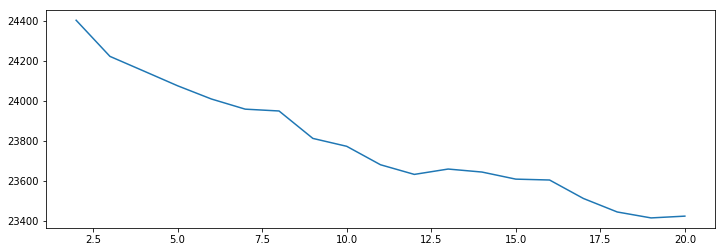

CPU times: user 3min 8s, sys: 5.3 s, total: 3min 14s
Wall time: 1min 43s


In [46]:
%%time
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans

#hc = AgglomerativeClustering()
#hc
clusters = []
costs = []
for n_clusters in range(2,21):
  #model = KMeans(n_clusters=n_clusters, n_jobs=-2)
  model = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000)
  model.fit(X)
  clusters.append(n_clusters)
  costs.append(model.inertia_)
  print('k:',n_clusters,'| cost:', model.inertia_)
plt.figure(figsize=(12,4))
plt.plot(clusters,costs)
plt.show()

In [48]:
%%time
mbkm_model = MiniBatchKMeans(n_clusters=7, batch_size=10000)
mbkm_model.fit(X)

CPU times: user 6.84 s, sys: 180 ms, total: 7.02 s
Wall time: 3.68 s


In [49]:
pd.get_dummies(mbkm_model.labels_).rename(columns=(dict([(n,f'desc_{n+1}') for n in range(7)]))).head(4)

,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0


In [125]:
'''
stopwords = ['a', 'al', 'ante', 'aquel', 'aires', 'bien', 'buenos', 'como', 'con', 'conseguir', 'cual', 'de', 'del', 'descripcion', 
             'desde', 'donde', 'e', 'el', 'ella', 'ello', 'en', 'es', 'esa', 'encima', 'entonces', 'entre', 'encontramos', 
             'encuentra', 'era', 'esta', 'estas' 'estan', 'etc', 'fe', 'fue', 'gusta', 'hs', 'ha', 'hacen', 'hacemos', 'hacer', 'hasta', 
             'incluso', 'ir', 'jamas', 'jamas', 'la', 'las', 'lo', 'los', 'mas', 'me', 'menos', 'mi', 'mis', 'misma', 'mismo', 'mucha', 'muchas', 
             'mucho', 'muchos', 'muy', 'ni', 'no', 'nos', 'nosotros', 'nuestras', 'nuestra', 'nuestro', 'nuestros', 'o', 'para', 'por', 'puesta', 
             'que', 'qué', 'sabe', 'santa', 'saber', 'se', 'solicitamos', 'selecciona', 'segun', 'ser', 'serán', 'seran', 'si', 'siendo', 'sin', 
             'sobre', 'solo', 'solicita', 'somos', 'su', 'sus', 'te', 'trabajar', 'tiene', 'tus', 'tu', 'uso', 
             'un', 'una', 'ubicada', 'valoramos', 'vaya', 'y']

invalid_characters = [',', ':', '.', ';', '?', '¿', '!', '¡', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                      '<', '>', '-', '_', '/', '*', '\r', '\n', '', '·', '§', 'ª', '+']

def clean_html(string):
    clean_html_regex = re.compile('<.*?>')
    string = re.sub(clean_html_regex, ' ', string).strip()
    return string

def clean_string(row, col):     
    for invalid_char in invalid_characters:
        row[col] = row[col].replace(invalid_char, ' ').strip()
        row[col] = row[col].strip().lower()
    
    row[col] = row[col].replace('á', "a")
    row[col] = row[col].replace('é', "e")
    row[col] = row[col].replace('í', "i")
    row[col] = row[col].replace('ó', "o")
    row[col] = row[col].replace('ú', "u")
    row[col] = row[col].replace('ü', "u")
    
    words = row[col].split()
    
    # Se filtran las stop words
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word == w):
                word = word.replace(w, ' ')
        if (word.strip() != ''):
            valid_words.append(word)
        
    row[col] = valid_words
    return row
    
def process_words(row, columna):
    lista_palabras_frecuentes_descripcion = []
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_descripcion.append(word)
    row[columna] = Counter(lista_palabras_frecuentes_descripcion).most_common(25)
    
    return row    
'''    

In [126]:
#avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: clean_string(row, 'descripcion'), axis=1)

In [127]:
avisos_detalle_joined['descripcion'].head(3)

0    [importante, cadena, farmacias, zona, oeste, e...
1    [manejar, queres, ganar, plata, haciendo, cont...
2    [operarios, plantanos, busqueda, operarios, em...
Name: descripcion, dtype: object

In [128]:
#avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: process_words(row, 'descripcion'), axis=1)

In [129]:
avisos_detalle_joined.head(3)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,17903700,Enfermeras,"[(oeste, 2), (experiencia, 2), (años, 2), (imp...",Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
1,1000150677,Chofer de taxi,"[(tenes, 3), (estas, 2), (trabajo, 2), (años, ...",Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
2,1000872556,Operarios de Planta - Rubro Electrodomésticos,"[(control, 6), (produccion, 4), (operarios, 2)...",Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [130]:
#avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: clean_string(row, 'titulo'), axis=1)

In [131]:
avisos_detalle_joined.head(3)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,17903700,[enfermeras],"[(oeste, 2), (experiencia, 2), (años, 2), (imp...",Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
1,1000150677,"[chofer, taxi]","[(tenes, 3), (estas, 2), (trabajo, 2), (años, ...",Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
2,1000872556,"[operarios, planta, rubro, electrodomesticos]","[(control, 6), (produccion, 4), (operarios, 2)...",Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [57]:
print(len(avisos_detalle_joined))

25288


In [176]:
avisos_detalle_joined.drop(['denominacion_empresa'], axis=1, inplace=True)

ValueError: labels ['denominacion_empresa'] not contained in axis

In [177]:
def remove_whitespaces(row, col):
    row[col] = "".join(row[col].split())
    return row

In [178]:
# Eliminamos los espacios en blanco para evitar problemas con el nombre de las columnas
avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: remove_whitespaces(row, 'nivel_laboral'), axis=1)
avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: remove_whitespaces(row, 'nombre_area'), axis=1)

In [179]:
print(len(avisos_detalle_joined))

25288


In [180]:
avisos_detalle_joined.drop_duplicates(subset='idaviso', keep="last", inplace=True)

In [181]:
print(len(avisos_detalle_joined))

25288


In [182]:
avisos_detalle_joined.dtypes

idaviso             int64
titulo             object
descripcion        object
tipo_de_trabajo    object
nivel_laboral      object
nombre_area        object
dtype: object

#### Transformaciones para las postulaciones

In [183]:
postulaciones_train.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [184]:
postulaciones_train.drop(columns=['fechapostulacion'], inplace=True)

In [185]:
# Contamos la cantidad de postulaciones para cada aviso y lo agregamos a una nueva columna
cant_postulaciones_por_aviso = postulaciones_train.groupby('idaviso').agg({'idpostulante':'count'})
cant_postulaciones_por_aviso.reset_index(inplace=True)
cant_postulaciones_por_aviso.rename(columns = {'idpostulante':'cant_postulaciones_aviso'}, inplace = True)

In [234]:
cant_postulaciones_por_aviso.head(3)

,idaviso,cant_postulaciones_aviso
0,8725750,137
1,11740890,13
2,12543760,1080


In [235]:
cant_postulaciones_por_aviso.dtypes

idaviso                     int64
cant_postulaciones_aviso    int64
dtype: object

#### Transformaciones para las vistas

In [187]:
vistas_train.rename(columns={'idAviso':'idaviso','timestamp':'fechavista'}, inplace=True)
vistas_desde_15_04.rename(columns={'idAviso':'idaviso','timestamp':'fechavista'}, inplace=True)

In [188]:
vistas_joined = pd.concat([vistas_train, vistas_desde_15_04])

In [189]:
print(len(vistas_joined))
vistas_joined.drop_duplicates(subset=['idaviso', 'fechavista', 'idpostulante'])
print(len(vistas_joined))

18330821
18330821


In [190]:
vistas_joined.drop(columns=['fechavista'], inplace=True)

In [191]:
vistas_joined.head(1)

,idaviso,idpostulante
0,1111780242,YjVJQ6Z


In [192]:
# Contamos la cantidad de postulaciones para cada aviso y lo agregamos a una nueva columna
cant_vistas_por_aviso = vistas_joined.groupby('idaviso').agg({'idpostulante':'count'})
cant_vistas_por_aviso.reset_index(inplace=True)
cant_vistas_por_aviso.rename(columns = {'idpostulante':'cant_vistas_aviso'}, inplace = True)
cant_vistas_por_aviso.head(5)

,idaviso,cant_vistas_aviso
0,18,3
1,48375,1
2,169730,51
3,178417,1
4,189006,2


In [236]:
cant_vistas_por_aviso.dtypes

idaviso              int64
cant_vistas_aviso    int64
dtype: object

In [206]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area
0,1000872556,"['operarios', 'planta', 'rubro', 'electrodomes...","[('control', 6), ('produccion', 4), ('operario...",Full-time,Senior/Semi-Senior,Producción


In [238]:
avisos_detalle_joined = pd.merge(avisos_detalle_joined, cant_vistas_por_aviso, how='left', on=['idaviso'])

In [240]:
avisos_detalle_joined['cant_vistas_aviso'].fillna(0,inplace = True)
avisos_detalle_joined['cant_vistas_aviso'] = avisos_detalle_joined['cant_vistas_aviso'].astype(int)

In [241]:
avisos_detalle_joined.head(15)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso
0,1000872556,"['operarios', 'planta', 'rubro', 'electrodomes...","[('control', 6), ('produccion', 4), ('operario...",Full-time,Senior/Semi-Senior,Producción,1
1,9240880,"['productores', 'asesores', 'independiente', '...","[('agente', 1), ('oficial', 1), ('busqueda', 1...",Full-time,Jefe/Supervisor/Responsable,Comercial,1
2,1110185164,"['administrativo', 'recepcion']","[('medico', 2), ('pacientes', 2), ('atencion',...",Full-time,Junior,Administración,1
3,1110513885,"['distribuidor', 'domiciliario', 'moto', 'san'...","[('excluyente', 4), ('requisitos', 2), ('impor...",Full-time,Junior,Distribución,1
4,1111034024,"['vendedores', 'venta', 'medicina', 'pre', 'pa...","[('vendedores', 2), ('trabajo', 2), ('comercia...",Full-time,Senior/Semi-Senior,Comercial,2
5,1111101289,"['pm', 'zona', 'norte', 'pacheco']","[('proyecto', 9), ('plan', 4), ('controlar', 3...",Full-time,Senior/Semi-Senior,LiderazgodeProyecto,1
6,1111109704,"['supervisor', 'obra', 'civil', 'electrico', '...","[('construccion', 3), ('supervision', 3), ('co...",Full-time,Senior/Semi-Senior,Construcción,1
7,1111172357,"['empleado', 'administrativo', 'tramites', 'ha...","[('años', 2), ('tareas', 2), ('trabajo', 2), (...",Full-time,Senior/Semi-Senior,Administración,1
8,1111174081,"['gestor', 'cobranzas', 'telecobrador']","[('estamos', 2), ('gestion', 2), ('activos', 1...",Part-time,Senior/Semi-Senior,CallCenter,1
9,1111235995,"['analista', 'recursos', 'humanos', 'quilmes',...","[('empresas', 2), ('recursos', 2), ('humanos',...",Full-time,Senior/Semi-Senior,RecursosHumanos,1


In [244]:
avisos_detalle_joined.cant_vistas_aviso.isnull().sum()

0

In [245]:
avisos_detalle_joined = pd.merge(avisos_detalle_joined, cant_postulaciones_por_aviso, how='left', on=['idaviso'])

In [246]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
0,1000872556,"['operarios', 'planta', 'rubro', 'electrodomes...","[('control', 6), ('produccion', 4), ('operario...",Full-time,Senior/Semi-Senior,Producción,1,NaN


In [247]:
avisos_detalle_joined['cant_postulaciones_aviso'].fillna(0,inplace = True)
avisos_detalle_joined['cant_postulaciones_aviso'] = avisos_detalle_joined['cant_postulaciones_aviso'].astype(int)

In [248]:
avisos_detalle_joined.cant_postulaciones_aviso.isnull().sum()

0

In [251]:
avisos_detalle_joined.sample(5)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
2407,1112351910,"['analista', 'recupero', 'crediticio', 'banco'...","[('conocimientos', 6), ('servicios', 3), ('exp...",Full-time,Senior/Semi-Senior,CréditosyCobranzas,744,846
10145,1111746961,"['english', 'instructors']","[('and', 5), ('to', 5), ('we', 4), ('are', 4),...",Full-time,Otro,Idiomas,41,176
20168,1112362468,"['empleado', 'servicio', 'tecnico']","[('atencion', 2), ('mercaderia', 2), ('product...",Full-time,Junior,AtenciónalCliente,1427,1015
898,1112343189,"['jefe', 'mantenimiento']","[('mecanica', 3), ('experiencia', 3), ('busque...",Full-time,Jefe/Supervisor/Responsable,Logística,74,159
7005,1112315185,"['promotoras', 'ventas']","[('excluyente', 3), ('fabrica', 2), ('viajar',...",Full-time,Senior/Semi-Senior,Ventas,0,114


In [252]:
postulantes_joined.to_csv('../data/postulantes_joined.csv', index=False, sep=',', encoding='utf-8')

In [253]:
avisos_detalle_joined.to_csv('../data/avisos_detalle_joined.csv', index=False, sep=',', encoding='utf-8')

In [144]:
#vistas_train.to_csv('../data/3_vistas_train.csv', index=False, sep=',', encoding='utf-8')
#vistas_desde_15_04.to_csv('../data/3_vistas_test.csv', index=False, sep=',', encoding='utf-8')

# Juntamos todo en un solo DF

In [145]:
#vistas = pd.read_csv('../data/3_vistas_train.csv', encoding='utf-8')
#avisos_online = pd.read_csv('../data/5_avisos_online_train.csv', encoding='utf-8')

In [2]:
avisos_detalle_joined = pd.read_csv('../data/avisos_detalle_joined.csv', encoding='utf-8')
postulantes_joined = pd.read_csv('../data/postulantes_joined.csv', encoding='utf-8')
postulaciones = pd.read_csv('../data/4_postulaciones_train.csv', encoding='utf-8')

In [4]:
vistas_test = pd.read_csv('../data/3_vistas_test.csv', encoding='utf-8')

## Set a predecir

In [3]:
data_predecir = pd.read_csv('../data/test_final_100k.csv', encoding='utf-8')

In [4]:
print('Existen ids repetidos en el set a predecir:',data_predecir.duplicated('id').any())

Existen ids repetidos en el set a predecir: False


In [5]:
postulantes_conocidos = postulantes_joined.merge(data_predecir, on=['idpostulante'], how='inner')
print('Existen datos de',len(data_predecir) - len(postulantes_conocidos), 'postulantes para los que no tenemos datos')

Existen datos de 8576 postulantes para los que no tenemos datos


# POR MEMORIA ELIMINAMOS LAS COLUMNAS DESCRIPCION, TITULO Y AREA POR AHORA

In [6]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
0,1000872556,"['operarios', 'planta', 'rubro', 'electrodomes...","[('control', 6), ('produccion', 4), ('operario...",Full-time,Senior/Semi-Senior,Producción,1,0


In [7]:
avisos_detalle_joined.drop(columns=['titulo', 'descripcion'], inplace=True)

### Genero un set de 'no_postulados' con una muestra random para crear casos en que postulantes no aplican a a visos

In [8]:
postulantes_sample = postulantes_joined.sample(10000)
for i in range(1,650):
    postulantes_sample = pd.concat([postulantes_sample, postulantes_joined.sample(10000)])

In [9]:
print(len(postulantes_sample))

6500000


In [10]:
postulantes_sample.reset_index(inplace=True)
postulantes_sample.drop(columns = 'index', inplace = True)
postulantes_sample.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,mzJlLzG,Secundario,Graduado,1985-01-13,MASC,33


In [11]:
avisos_sample = avisos_detalle_joined.sample(10000)
for i in range(1,650):
    avisos_sample = pd.concat([avisos_sample, avisos_detalle_joined.sample(10000)])

In [12]:
print(len(avisos_sample))

6500000


In [13]:
avisos_sample.reset_index(inplace=True)
avisos_sample.drop(columns = 'index', inplace = True)
avisos_sample.head(1)

,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
0,1112297488,Full-time,Senior/Semi-Senior,Planeamientocomercial,44,245


In [14]:
no_postulados = postulantes_sample.join(avisos_sample)

In [15]:
print(len(no_postulados))
no_postulados.head(1)

6500000


,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
0,mzJlLzG,Secundario,Graduado,1985-01-13,MASC,33,1112297488,Full-time,Senior/Semi-Senior,Planeamientocomercial,44,245


In [16]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

### Joineo al de entrenamiento con postulaciones (vistas por el momento no) y al de test con el pedido

In [17]:
print(len(postulaciones))

6604534


In [18]:
postulaciones.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [19]:
postulaciones_postulantes = pd.merge(postulaciones, postulantes_joined, on='idpostulante', how='left')

In [20]:
postulaciones_postulantes_test = pd.merge(data_predecir, postulantes_joined, on='idpostulante', how='left')

In [21]:
postulaciones_postulantes_test.duplicated('id').any()

False

In [22]:
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48


In [23]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,0,739260,6M9ZQR,Doctorado,Graduado,1976-03-29,FEM,42.0


In [24]:
print(len(postulaciones_postulantes))

6604615


In [25]:
postulaciones_postulantes.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
nombre_estudio      False
estado_estudio      False
fechanacimiento     False
sexo                False
edad                False
dtype: bool

In [26]:
postulaciones_postulantes_test.isnull().any()

id                 False
idaviso            False
idpostulante       False
nombre_estudio      True
estado_estudio      True
fechanacimiento     True
sexo                True
edad                True
dtype: bool

In [27]:
most_freq_nombre_estudio = postulaciones_postulantes_test.nombre_estudio.mode()[0]
postulaciones_postulantes_test.nombre_estudio.fillna(most_freq_nombre_estudio,inplace=True)
postulaciones_postulantes_test.nombre_estudio.isnull().any()

False

In [28]:
most_freq_estado_estudio = postulaciones_postulantes_test.estado_estudio.mode()[0]
postulaciones_postulantes_test.estado_estudio.fillna(most_freq_estado_estudio,inplace=True)
postulaciones_postulantes_test.estado_estudio.isnull().any()

False

In [29]:
most_freq_fechanacimiento = postulaciones_postulantes_test.fechanacimiento.mode()[0]
postulaciones_postulantes_test.fechanacimiento.fillna(most_freq_fechanacimiento,inplace=True)
postulaciones_postulantes_test.fechanacimiento.isnull().any()

False

In [30]:
most_freq_sexo = postulaciones_postulantes_test.sexo.mode()[0]
postulaciones_postulantes_test.sexo.fillna(most_freq_sexo,inplace=True)
postulaciones_postulantes_test.sexo.isnull().any()

False

In [31]:
most_freq_edad = postulaciones_postulantes_test.edad.mode()[0]
postulaciones_postulantes_test.edad.fillna(most_freq_edad,inplace=True)
postulaciones_postulantes_test.edad.isnull().any()

False

In [32]:
no_postulados.isnull().any()

idpostulante                False
nombre_estudio              False
estado_estudio              False
fechanacimiento             False
sexo                        False
edad                        False
idaviso                     False
tipo_de_trabajo             False
nivel_laboral               False
nombre_area                 False
cant_vistas_aviso           False
cant_postulaciones_aviso    False
dtype: bool

In [33]:
postulaciones_postulantes_test.isnull().any()

id                 False
idaviso            False
idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [34]:
postulaciones_postulantes_test.isnull().any()

id                 False
idaviso            False
idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

#### One hot encoding de columnas categoricas

In [35]:
postulaciones_postulantes['nombre_estudio'] = postulaciones_postulantes['nombre_estudio'].astype(str)
postulaciones_postulantes['estado_estudio'] = postulaciones_postulantes['estado_estudio'].astype(str)
postulaciones_postulantes_test['nombre_estudio'] = postulaciones_postulantes_test['nombre_estudio'].astype(str)
postulaciones_postulantes_test['estado_estudio'] = postulaciones_postulantes_test['estado_estudio'].astype(str)

In [36]:
no_postulados['nombre_estudio'] = no_postulados['nombre_estudio'].astype(str)
no_postulados['estado_estudio'] = no_postulados['estado_estudio'].astype(str)

In [37]:
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48


In [38]:
nombres_estudio = postulaciones_postulantes.nombre_estudio.str.get_dummies()
nombres_estudio.columns = ['nombre_estudio_' + col for col in nombres_estudio.columns]
postulaciones_postulantes = pd.concat([postulaciones_postulantes, nombres_estudio], axis=1)

In [39]:
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48,0,0,0,0,1,0,0


In [40]:
nombres_estudio = postulaciones_postulantes_test.nombre_estudio.str.get_dummies()
nombres_estudio.columns = ['nombre_estudio_' + col for col in nombres_estudio.columns]
postulaciones_postulantes_test = pd.concat([postulaciones_postulantes_test, nombres_estudio], axis=1)

In [41]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario
0,0,739260,6M9ZQR,Doctorado,Graduado,1976-03-29,FEM,42.0,1,0,0,0,0,0,0


In [42]:
nombres_estudio = no_postulados.nombre_estudio.str.get_dummies()
nombres_estudio.columns = ['nombre_estudio_' + col for col in nombres_estudio.columns]
no_postulados = pd.concat([no_postulados, nombres_estudio], axis=1)

In [43]:
postulaciones_postulantes.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion', 'nombre_estudio',
       'estado_estudio', 'fechanacimiento', 'sexo', 'edad',
       'nombre_estudio_Doctorado', 'nombre_estudio_Master',
       'nombre_estudio_Otro', 'nombre_estudio_Posgrado',
       'nombre_estudio_Secundario', 'nombre_estudio_Terciario/Tecnico',
       'nombre_estudio_Universitario'],
      dtype='object')

In [44]:
postulaciones_postulantes_test.columns

Index(['id', 'idaviso', 'idpostulante', 'nombre_estudio', 'estado_estudio',
       'fechanacimiento', 'sexo', 'edad', 'nombre_estudio_Doctorado',
       'nombre_estudio_Master', 'nombre_estudio_Otro',
       'nombre_estudio_Posgrado', 'nombre_estudio_Secundario',
       'nombre_estudio_Terciario/Tecnico', 'nombre_estudio_Universitario'],
      dtype='object')

In [45]:
no_postulados.columns

Index(['idpostulante', 'nombre_estudio', 'estado_estudio', 'fechanacimiento',
       'sexo', 'edad', 'idaviso', 'tipo_de_trabajo', 'nivel_laboral',
       'nombre_area', 'cant_vistas_aviso', 'cant_postulaciones_aviso',
       'nombre_estudio_Doctorado', 'nombre_estudio_Master',
       'nombre_estudio_Otro', 'nombre_estudio_Posgrado',
       'nombre_estudio_Secundario', 'nombre_estudio_Terciario/Tecnico',
       'nombre_estudio_Universitario'],
      dtype='object')

In [46]:
estados_estudio = postulaciones_postulantes.estado_estudio.str.get_dummies()
estados_estudio.columns = ['estado_estudio_' + col for col in estados_estudio.columns]
postulaciones_postulantes = pd.concat([postulaciones_postulantes, estados_estudio], axis=1)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48,0,0,0,0,1,0,0,0,0,1


In [47]:
estados_estudio = postulaciones_postulantes_test.estado_estudio.str.get_dummies()
estados_estudio.columns = ['estado_estudio_' + col for col in estados_estudio.columns]
postulaciones_postulantes_test = pd.concat([postulaciones_postulantes_test, estados_estudio], axis=1)
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,0,739260,6M9ZQR,Doctorado,Graduado,1976-03-29,FEM,42.0,1,0,0,0,0,0,0,0,0,1


In [48]:
estados_estudio = no_postulados.estado_estudio.str.get_dummies()
estados_estudio.columns = ['estado_estudio_' + col for col in estados_estudio.columns]
no_postulados = pd.concat([no_postulados, estados_estudio], axis=1)
no_postulados.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,mzJlLzG,Secundario,Graduado,1985-01-13,MASC,33,1112297488,Full-time,Senior/Semi-Senior,Planeamientocomercial,44,245,0,0,0,0,1,0,0,0,0,1


In [49]:
postulaciones_postulantes.drop(columns=['nombre_estudio', 'estado_estudio'], inplace=True)
postulaciones_postulantes_test.drop(columns=['nombre_estudio', 'estado_estudio'], inplace=True)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM,48,0,0,0,0,1,0,0,0,0,1


In [50]:
no_postulados.drop(columns=['nombre_estudio', 'estado_estudio'], inplace=True)

In [51]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,0,739260,6M9ZQR,1976-03-29,FEM,42.0,1,0,0,0,0,0,0,0,0,1


In [52]:
postulaciones_postulantes.drop(columns=['fechapostulacion', 'fechanacimiento'], inplace=True)
postulaciones_postulantes_test.drop(columns=['fechanacimiento'], inplace=True)

In [53]:
no_postulados.drop(columns=['fechanacimiento'], inplace=True)

In [54]:
postulaciones_postulantes['sexo'].value_counts()

FEM           3354795
MASC          3154899
NO_DECLARA      94919
0.0                 2
Name: sexo, dtype: int64

In [55]:
sexos = postulaciones_postulantes.sexo.str.get_dummies()
sexos.drop(columns='0.0', inplace=True)
sexos.head(1)

,FEM,MASC,NO_DECLARA
0,1,0,0


In [56]:
sexos.columns = ['sexo_' + col for col in sexos.columns]
postulaciones_postulantes = pd.concat([postulaciones_postulantes, sexos], axis=1)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1112257047,NM5M,FEM,48,0,0,0,0,1,0,0,0,0,1,1,0,0


In [57]:
sexos = postulaciones_postulantes_test.sexo.str.get_dummies()
#sexos.drop(columns='0.0', inplace=True)
sexos.head(1)

,FEM,MASC,NO_DECLARA
0,1,0,0


In [58]:
sexos.columns = ['sexo_' + col for col in sexos.columns]
postulaciones_postulantes_test = pd.concat([postulaciones_postulantes_test, sexos], axis=1)
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,0,739260,6M9ZQR,FEM,42.0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [59]:
sexos = no_postulados.sexo.str.get_dummies()
sexos.drop(columns='0.0', inplace=True)
sexos.columns = ['sexo_' + col for col in sexos.columns]
no_postulados = pd.concat([no_postulados, sexos], axis=1)
no_postulados.head(1)

,idpostulante,sexo,edad,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,mzJlLzG,MASC,33,1112297488,Full-time,Senior/Semi-Senior,Planeamientocomercial,44,245,0,0,0,0,1,0,0,0,0,1,0,1,0


In [60]:
postulaciones_postulantes.drop(columns=['sexo'], inplace=True)
postulaciones_postulantes_test.drop(columns=['sexo'], inplace=True)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0


In [61]:
no_postulados.drop(columns=['sexo'], inplace=True)

In [62]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,0,739260,6M9ZQR,42.0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [63]:
postulaciones_postulantes['edad'] = postulaciones_postulantes['edad'].astype(int)
postulaciones_postulantes_test['edad'] = postulaciones_postulantes_test['edad'].astype(int)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0


In [64]:
no_postulados['edad'] = no_postulados['edad'].astype(int)

In [65]:
postulaciones_postulantes.isnull().any()

idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
dtype: bool

In [66]:
postulaciones_postulantes_test.isnull().any()

id                                  False
idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
dtype: bool

In [67]:
no_postulados.isnull().any()

idpostulante                        False
edad                                False
idaviso                             False
tipo_de_trabajo                     False
nivel_laboral                       False
nombre_area                         False
cant_vistas_aviso                   False
cant_postulaciones_aviso            False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
dtype: bool

In [68]:
postulaciones_postulantes.dtypes

idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [69]:
postulaciones_postulantes_test.dtypes

id                                   int64
idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [70]:
no_postulados.dtypes

idpostulante                        object
edad                                 int64
idaviso                              int64
tipo_de_trabajo                     object
nivel_laboral                       object
nombre_area                         object
cant_vistas_aviso                    int64
cant_postulaciones_aviso             int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [71]:
postulaciones_postulantes.to_csv('../data/postulaciones_postulantes.csv', index=False, sep=',', encoding='utf-8')

In [2]:
postulaciones_postulantes = pd.read_csv('../data/postulaciones_postulantes.csv', encoding='utf-8')

In [72]:
postulaciones_postulantes_test.to_csv('../data/postulaciones_postulantes_test.csv', index=False, sep=',', encoding='utf-8')

In [3]:
postulaciones_postulantes_test = pd.read_csv('../data/postulaciones_postulantes_test.csv', encoding='utf-8')

In [73]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

In [4]:
no_postulados = pd.read_csv('../data/no_postulados.csv', encoding='utf-8')

In [5]:
postulaciones_postulantes.dtypes

idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [6]:
postulaciones_postulantes_test.dtypes

id                                   int64
idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

### Juntamos con los avisos

In [7]:
avisos_detalle_joined = pd.read_csv('../data/avisos_detalle_joined.csv', encoding='utf-8')

In [8]:
mem_test=avisos_detalle_joined.memory_usage(index=True).sum()
print("avisos_detalle_joined usa ",mem_test/ 1024**2," MB")
mem_test=postulaciones_postulantes.memory_usage(index=True).sum()
print("postulaciones_postulantes usa ",mem_test/ 1024**2," MB")

avisos_detalle_joined usa  1.5435333251953125  MB
postulaciones_postulantes usa  806.2274932861328  MB


In [9]:
postulaciones_postulantes_avisos = pd.merge(postulaciones_postulantes, avisos_detalle_joined, on='idaviso', how='left')

In [10]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,"['representantes', 'atencion', 'cliente', 'ret...","[('retencion', 3), ('atencion', 2), ('cliente'...",Part-time,Otro,AtenciónalCliente,8.0,2391.0


In [11]:
postulaciones_postulantes_avisos.isnull().any()

idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
titulo                               True
descripcion                          True
tipo_de_trabajo                      True
nivel_laboral                        True
nombre_area                          True
cant_vistas_aviso                    True
cant_postulaciones_aviso             True
dtype: bool

In [12]:
postulaciones_postulantes_avisos_test = pd.merge(postulaciones_postulantes_test, avisos_detalle_joined, on='idaviso', how='left')

In [13]:
len(postulaciones_postulantes_avisos_test)

100000

In [14]:
postulaciones_postulantes_test.duplicated('id').any()

False

In [15]:
postulaciones_postulantes_avisos_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Full-time,Jefe/Supervisor/Responsable,Comercial,2,0


In [16]:
postulaciones_postulantes_avisos_test.isnull().any()

id                                  False
idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
titulo                              False
descripcion                         False
tipo_de_trabajo                     False
nivel_laboral                       False
nombre_area                         False
cant_vistas_aviso                   False
cant_postulaciones_aviso          

#### One hot encoding de columnas categoricas

In [17]:
postulaciones_postulantes_avisos['tipo_full'] = (postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) == 'Full-time').astype(bool)
postulaciones_postulantes_avisos['tipo_part'] = (postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) == 'Part-time').astype(bool)
postulaciones_postulantes_avisos['tipo_otro'] = ((postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) != 'Part-time') & (postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) != 'Full-time')).astype(bool)

In [18]:
postulaciones_postulantes_avisos_test['tipo_full'] = (postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) == 'Full-time').astype(bool)
postulaciones_postulantes_avisos_test['tipo_part'] = (postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) == 'Part-time').astype(bool)
postulaciones_postulantes_avisos_test['tipo_otro'] = ((postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) != 'Part-time') & (postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) != 'Full-time')).astype(bool)

In [19]:
no_postulados['tipo_full'] = (no_postulados['tipo_de_trabajo'].astype(str) == 'Full-time').astype(bool)
no_postulados['tipo_part'] = (no_postulados['tipo_de_trabajo'].astype(str) == 'Part-time').astype(bool)
no_postulados['tipo_otro'] = ((no_postulados['tipo_de_trabajo'].astype(str) != 'Part-time') & (no_postulados['tipo_de_trabajo'].astype(str) != 'Full-time')).astype(bool)

In [20]:
postulaciones_postulantes_avisos.drop(['tipo_de_trabajo'], axis=1, inplace=True)
postulaciones_postulantes_avisos_test.drop(['tipo_de_trabajo'], axis=1, inplace=True)

In [21]:
no_postulados.drop(['tipo_de_trabajo'], axis=1, inplace=True)

In [22]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,"['representantes', 'atencion', 'cliente', 'ret...","[('retencion', 3), ('atencion', 2), ('cliente'...",Otro,AtenciónalCliente,8.0,2391.0,False,True,False


In [23]:
postulaciones_postulantes_avisos_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Jefe/Supervisor/Responsable,Comercial,2,0,True,False,False


In [24]:
postulaciones_postulantes_avisos['nivel_laboral'].value_counts()

Senior/Semi-Senior                 4089753
Junior                             1361408
Otro                                506359
Jefe/Supervisor/Responsable         186571
Gerencia/AltaGerencia/Dirección      44623
Name: nivel_laboral, dtype: int64

In [25]:
postulaciones_postulantes_avisos['nivel_laboral'] = postulaciones_postulantes_avisos['nivel_laboral'].astype(str)
postulaciones_postulantes_avisos_test['nivel_laboral'] = postulaciones_postulantes_avisos_test['nivel_laboral'].astype(str)
postulaciones_postulantes_avisos.dtypes

idaviso                               int64
idpostulante                         object
edad                                  int64
nombre_estudio_Doctorado              int64
nombre_estudio_Master                 int64
nombre_estudio_Otro                   int64
nombre_estudio_Posgrado               int64
nombre_estudio_Secundario             int64
nombre_estudio_Terciario/Tecnico      int64
nombre_estudio_Universitario          int64
estado_estudio_Abandonado             int64
estado_estudio_EnCurso                int64
estado_estudio_Graduado               int64
sexo_FEM                              int64
sexo_MASC                             int64
sexo_NO_DECLARA                       int64
titulo                               object
descripcion                          object
nivel_laboral                        object
nombre_area                          object
cant_vistas_aviso                   float64
cant_postulaciones_aviso            float64
tipo_full                       

In [26]:
no_postulados['nivel_laboral'] = no_postulados['nivel_laboral'].astype(str)

In [27]:
postulaciones_postulantes_avisos_test.dtypes

id                                   int64
idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
titulo                              object
descripcion                         object
nivel_laboral                       object
nombre_area                         object
cant_vistas_aviso                    int64
cant_postulaciones_aviso             int64
tipo_full  

In [28]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nivel_laboral,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,"['representantes', 'atencion', 'cliente', 'ret...","[('retencion', 3), ('atencion', 2), ('cliente'...",Otro,AtenciónalCliente,8.0,2391.0,False,True,False


In [29]:
niveles_laborales = postulaciones_postulantes_avisos.nivel_laboral.str.get_dummies()
niveles_laborales.columns = ['nivel_laboral_' + col for col in niveles_laborales.columns]
postulaciones_postulantes_avisos = pd.concat([postulaciones_postulantes_avisos, niveles_laborales], axis=1)
postulaciones_postulantes_avisos.drop(columns=['nivel_laboral'], inplace=True)
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,"['representantes', 'atencion', 'cliente', 'ret...","[('retencion', 3), ('atencion', 2), ('cliente'...",AtenciónalCliente,8.0,2391.0,False,True,False,0,0,0,1,0,0


In [30]:
niveles_laborales = postulaciones_postulantes_avisos_test.nivel_laboral.str.get_dummies()
niveles_laborales.columns = ['nivel_laboral_' + col for col in niveles_laborales.columns]
postulaciones_postulantes_avisos_test = pd.concat([postulaciones_postulantes_avisos_test, niveles_laborales], axis=1)
postulaciones_postulantes_avisos_test.drop(columns=['nivel_laboral'], inplace=True)
postulaciones_postulantes_avisos_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Comercial,2,0,True,False,False,0,1,0,0,0


In [31]:
niveles_laborales = no_postulados.nivel_laboral.str.get_dummies()
niveles_laborales.columns = ['nivel_laboral_' + col for col in niveles_laborales.columns]
no_postulados = pd.concat([no_postulados, niveles_laborales], axis=1)
no_postulados.drop(columns=['nivel_laboral'], inplace=True)
no_postulados.head(1)

,idpostulante,edad,idaviso,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior
0,mzJlLzG,33,1112297488,Planeamientocomercial,44,245,0,0,0,0,1,0,0,0,0,1,0,1,0,True,False,False,0,0,0,0,1


## One hot encoding de las areas principales

In [32]:
postulaciones_postulantes_avisos['nombre_area'].value_counts()

Ventas                                    860477
Administración                            582135
Producción                                507308
Comercial                                 434737
AtenciónalCliente                         395388
Recepcionista                             304565
CallCenter                                252928
Tesorería                                 155923
Telemarketing                             155494
MantenimientoyLimpieza                    117549
Almacén/Depósito/Expedición               115591
Contabilidad                              114176
RecursosHumanos                            90967
Gastronomia                                87830
Logística                                  85874
Secretaria                                 81428
AdministracióndePersonal                   69196
CréditosyCobranzas                         68032
Marketing                                  63181
Legal                                      58322
Compras             

In [ ]:
'''
areas = postulaciones_postulantes_avisos.nombre_area.str.get_dummies()
areas.columns = ['area_' + col for col in areas.columns]
postulaciones_postulantes_avisos = pd.concat([areas, postulaciones_postulantes_avisos], axis=1)
postulaciones_postulantes_avisos.head(1)
'''

In [ ]:
'''
areas = postulaciones_postulantes_avisos_test.nombre_area.str.get_dummies()
areas.columns = ['area_' + col for col in areas.columns]
postulaciones_postulantes_avisos_test = pd.concat([areas, postulaciones_postulantes_avisos_test], axis=1)
postulaciones_postulantes_avisos_test.head(1)
'''

In [145]:
'''
postulaciones_postulantes_avisos.drop(columns=['nombre_area'], inplace=True)
postulaciones_postulantes_avisos_test.drop(columns=['nombre_area'], inplace=True)
'''

In [33]:
# Tomamos top 20 de las areas 
areas_top_20 = postulaciones_postulantes_avisos['nombre_area'].value_counts().nlargest(20).index
for area in areas_top_20:
    postulaciones_postulantes_avisos[area] = (postulaciones_postulantes_avisos['nombre_area'] == area).astype(bool)

postulaciones_postulantes_avisos.head(2)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,"['representantes', 'atencion', 'cliente', 'ret...","[('retencion', 3), ('atencion', 2), ('cliente'...",AtenciónalCliente,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1111920714,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,"['telemarketers', 'part', 'time', 'venta', 'ta...","[('part', 2), ('time', 2), ('empresa', 2), ('o...",Telemarketing,3.0,524.0,False,True,False,0,0,0,0,1,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# Tomamos top 20 de las areas 
areas_top_20 = postulaciones_postulantes_avisos['nombre_area'].value_counts().nlargest(20).index
for area in areas_top_20:
    postulaciones_postulantes_avisos_test[area] = (postulaciones_postulantes_avisos_test['nombre_area'] == area).astype(bool)

postulaciones_postulantes_avisos_test.head(2)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Comercial,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,739260,6v1xdL,31,0,0,0,0,0,1,0,0,0,1,0,1,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Comercial,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
# Tomamos top 20 de las areas 
areas_top_20 = postulaciones_postulantes_avisos['nombre_area'].value_counts().nlargest(20).index
for area in areas_top_20:
    no_postulados[area] = (no_postulados['nombre_area'] == area).astype(bool)

postulaciones_postulantes_avisos_test.head(2)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,titulo,descripcion,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Comercial,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,739260,6v1xdL,31,0,0,0,0,0,1,0,0,0,1,0,1,0,"['asistente', 'comercial']","[('p', 2), ('cliente', 1), ('empresa', 1), ('n...",Comercial,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
print(postulaciones_postulantes_avisos.shape)
print(postulaciones_postulantes_avisos_test.shape)
print(no_postulados.shape)

(6604615, 50)
(100000, 50)
(6500000, 47)


In [40]:
postulaciones_postulantes_avisos.drop(columns=['titulo', 'descripcion'], inplace=True)
postulaciones_postulantes_avisos_test.drop(columns=['titulo', 'descripcion'], inplace=True)
#no_postulados.drop(columns=['titulo', 'descripcion'], inplace=True)

In [41]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

## Exportamos la estructura de los datos a predecir a un csv X_test

In [42]:
postulaciones_postulantes_avisos_test.to_csv('../data/X_test.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
no_postulados = pd.read_csv('../data/no_postulados.csv', sep=',', encoding='utf-8')

In [22]:
postulaciones_postulantes_avisos_test = pd.read_csv('../data/X_test.csv', sep=',', encoding='utf-8')

## Agregamos la columna a predecir y generamos muestras aleatorias para los casos negativos

In [43]:
postulaciones_postulantes_avisos['sepostulo'] = True

In [44]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [45]:
postulaciones_postulantes_avisos.to_csv('../data/postulaciones_postulantes_avisos.csv', index=False, sep=',', encoding='utf-8')

In [2]:
postulaciones_postulantes_avisos = pd.read_csv('../data/postulaciones_postulantes_avisos.csv', encoding='utf-8')

In [46]:
print(len(postulaciones_postulantes_avisos))
postulaciones_postulantes_avisos.head(1)

6604615


,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Juntamos con los pares (idAviso, idPostulante) con sepostulo == False

In [3]:
no_postulados = pd.read_csv('../data/no_postulados.csv', encoding='utf-8')

In [ ]:
no_postulados['sepostulo'] = False
no_postulados.head(1)

,idpostulante,edad,idaviso,nombre_area,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,mzJlLzG,33,1112297488,Planeamientocomercial,44,245,0,0,0,0,1,0,0,0,0,1,0,1,0,True,False,False,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
print(len(no_postulados))
no_postulados.head(1)

In [ ]:
postulaciones_postulantes_avisos.head(1)

In [ ]:
postulaciones_postulantes_avisos.dtypes

In [ ]:
no_postulados.dtypes

In [4]:
# No aguanta la memoria, tomo una muestra mas chica de ambos sets
postulaciones_postulantes_avisos = postulaciones_postulantes_avisos.sample(3000000)
no_postulados = no_postulados.sample(3000000)

In [5]:
training = pd.concat([postulaciones_postulantes_avisos, no_postulados])

In [6]:
training.head(1)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
3514287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,980.0,213.0,20,0,0,1,1112371208,Oqre00r,0,0,0,0,1,0.0,Administración,0,0,0,0,1,0,0,True,0,0,1,True,False,False


In [7]:
len(training)

6000000

In [8]:
training.to_csv('../data/X_train.csv', index=False, sep=',', encoding='utf-8')

In [2]:
training = pd.read_csv('../data/X_train.csv', sep=',', encoding='utf-8')

/home/tbotalla/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
training.drop_duplicates(subset = ['idaviso','idpostulante'], keep = 'first',inplace = True)

In [10]:
print(len(training))

5998526


In [11]:
training.sample(20)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
2677707,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,701.0,1018.0,61,0,0,1,1112361497,5ArG8G,0,0,1,0,0,0.0,Servicios,0,0,0,0,1,0,0,True,0,1,0,True,False,False
1118902,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2977.0,1354.0,30,0,0,1,1112353152,aaYlzJ,0,0,1,0,0,0.0,Producción,0,0,0,0,1,0,0,True,1,0,0,False,True,False
1081502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,7960.0,1995.0,25,0,0,1,1112305277,6rZEQ3R,0,0,1,0,0,0.0,Tesorería,0,0,0,0,1,0,0,True,1,0,0,True,False,False
1751211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,292.0,68.0,47,0,0,1,1112343203,xkaDv90,0,1,0,0,0,0.0,RecursosHumanos,0,1,0,0,0,0,0,True,0,1,0,True,False,False
3829361,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,249.0,33.0,26,0,0,1,1112295743,JBe84vE,0,0,0,0,1,NaN,Ventas,0,0,0,0,1,0,0,False,0,1,0,True,False,False
2779983,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1362.0,2848.0,31,0,1,0,1112417178,1e4BRB,0,0,0,0,1,0.0,RecursosHumanos,0,0,0,1,0,0,0,True,1,0,0,True,False,False
3113717,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,26.0,129.0,25,0,0,1,1112420844,W9V9NAe,0,1,0,0,0,NaN,SoporteTécnico,0,0,0,0,1,0,0,False,0,1,0,False,True,False
6221998,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,729.0,264.0,33,0,0,1,1112323017,ek4PM02,0,0,1,0,0,0.0,Logística,0,0,0,0,1,0,0,True,0,1,0,True,False,False
4224640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,421.0,819.0,35,0,1,0,1112363663,akbY0R5,0,0,0,0,1,0.0,ControldeGestión,0,0,0,0,0,0,1,True,0,1,0,True,False,False
5804146,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,213.0,36.0,36,1,0,0,1112397122,8kAAND,0,0,0,0,1,0.0,Planeamientocomercial,0,0,0,0,0,0,1,True,0,1,0,True,False,False


In [12]:
print(len(training[training['sepostulo'] == True]))
print(len(training[training['sepostulo'] == False]))

2999755
2998771


In [13]:
training.head(1)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
3514287,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,980.0,213.0,20,0,0,1,1112371208,Oqre00r,0,0,0,0,1,0.0,Administración,0,0,0,0,1,0,0,True,0,0,1,True,False,False


In [14]:
training.dtypes

Administración                                      bool
AdministracióndePersonal                            bool
Almacén/Depósito/Expedición                         bool
AtenciónalCliente                                   bool
CallCenter                                          bool
Comercial                                           bool
Contabilidad                                        bool
CréditosyCobranzas                                  bool
Gastronomia                                         bool
Legal                                               bool
Logística                                           bool
MantenimientoyLimpieza                              bool
Marketing                                           bool
Producción                                          bool
Recepcionista                                       bool
RecursosHumanos                                     bool
Secretaria                                          bool
Telemarketing                  

In [15]:
training.drop(columns=['nivel_laboral_nan'], inplace=True) #FIXME

In [16]:
# Shuffle de los elementos para que no queden todos los sepostulo true primero y los false al final
training = training.sample(frac=1).reset_index(drop=True)

In [17]:
training.head(15)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1171.0,1.0,40,1,0,0,1112271567,6QJ8el,0,0,0,0,1,Comercial,0,0,0,0,0,0,1,True,1,0,0,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1676.0,974.0,25,0,1,0,1112293412,JBxANXe,0,0,1,0,0,Selección,0,0,0,0,0,0,1,True,1,0,0,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,85.0,347.0,58,0,0,1,1112390224,ZGx3AE,0,0,0,0,1,Producción,0,0,0,0,0,0,1,False,1,0,0,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1295.0,13.0,22,0,0,1,1112232179,wVOWzDB,0,0,0,0,1,Tesorería,0,0,0,0,1,0,0,True,1,0,0,True,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,238.0,315.0,25,0,0,1,1112404372,0zdvWjq,0,0,0,0,1,Contabilidad,0,0,0,0,1,0,0,True,0,1,0,True,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,462.0,2027.0,62,0,0,1,1112388162,3NdVaYx,0,0,0,0,1,Compras,0,0,0,0,0,0,1,True,0,1,0,True,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,323.0,938.0,52,0,0,1,1112445511,1jzjW3,0,0,0,0,1,Facturación,0,0,0,0,0,0,1,False,0,1,0,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,234.0,0.0,32,0,0,1,1112286109,eMl5xj,0,0,0,0,1,Ventas,0,0,0,0,1,0,0,False,0,1,0,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1071.0,42.0,39,0,1,0,1112272847,6ZxkL4,0,0,0,0,1,RecursosHumanos,0,1,0,0,0,0,0,True,1,0,0,True,False,False
9,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,2.0,25,0,0,1,1111418806,akbaBQJ,0,0,1,0,0,AtenciónalCliente,0,0,0,0,0,1,0,False,1,0,0,True,False,False


In [36]:
postulaciones_postulantes_avisos_test = pd.read_csv('../data/X_test.csv', sep=',', encoding='utf-8')

In [18]:
training.head(15)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1171.0,1.0,40,1,0,0,1112271567,6QJ8el,0,0,0,0,1,Comercial,0,0,0,0,0,0,1,True,1,0,0,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1676.0,974.0,25,0,1,0,1112293412,JBxANXe,0,0,1,0,0,Selección,0,0,0,0,0,0,1,True,1,0,0,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,85.0,347.0,58,0,0,1,1112390224,ZGx3AE,0,0,0,0,1,Producción,0,0,0,0,0,0,1,False,1,0,0,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1295.0,13.0,22,0,0,1,1112232179,wVOWzDB,0,0,0,0,1,Tesorería,0,0,0,0,1,0,0,True,1,0,0,True,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,238.0,315.0,25,0,0,1,1112404372,0zdvWjq,0,0,0,0,1,Contabilidad,0,0,0,0,1,0,0,True,0,1,0,True,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,462.0,2027.0,62,0,0,1,1112388162,3NdVaYx,0,0,0,0,1,Compras,0,0,0,0,0,0,1,True,0,1,0,True,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,323.0,938.0,52,0,0,1,1112445511,1jzjW3,0,0,0,0,1,Facturación,0,0,0,0,0,0,1,False,0,1,0,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,234.0,0.0,32,0,0,1,1112286109,eMl5xj,0,0,0,0,1,Ventas,0,0,0,0,1,0,0,False,0,1,0,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1071.0,42.0,39,0,1,0,1112272847,6ZxkL4,0,0,0,0,1,RecursosHumanos,0,1,0,0,0,0,0,True,1,0,0,True,False,False
9,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,2.0,25,0,0,1,1111418806,akbaBQJ,0,0,1,0,0,AtenciónalCliente,0,0,0,0,0,1,0,False,1,0,0,True,False,False


In [19]:
target = training[['sepostulo']]
training.drop('sepostulo', axis=1, inplace=True)

In [41]:
print('train shape:',training.shape,'| target shape:',target.shape)
print('test shape:',postulaciones_postulantes_avisos_test.shape)

train shape: (5998506, 47) | target shape: (5998506, 1)
test shape: (100000, 48)


In [20]:
training.to_csv('../data/X_train.csv', index=False, sep=',', encoding='utf-8')
target.to_csv('../data/target.csv', index=False, sep=',', encoding='utf-8')

In [43]:
postulaciones_postulantes_avisos_test.to_csv('../data/X_test.csv', index=False, sep=',', encoding='utf-8')